# To Create cusotm 3D objects
1. Get the image of the model
2. Run image to 3D TripoSR model with run_tsr.process_images function
3. Then convert the obj file into correct format with convert_color.convert
4. Create environment and call

In [1]:
from Custom_3D.run_tsr import process_images
from Custom_3D.convert_color import convert
import os
import matplotlib.pyplot as plt
from glob import glob
from utils.objects import GenerationClass
from sapien.core import Pose


/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
names = sorted([i[:-4] for i in os.listdir('../data/object_images')])

In [4]:
name = names[0]
name

'apple'

In [5]:
process_images([f"../data/object_images/{name}.png"],
               output_dir=f"../models/{name}", foreground_ratio=0.8)
convert(f"../models/{name}/0/mesh.obj", f"../models/{name}")

2024-04-16 23:15:19,963 - INFO - Initializing model ...
2024-04-16 23:15:20,201 - INFO - Initializing model finished in 237.81ms.
2024-04-16 23:15:20,202 - INFO - Processing images ...
2024-04-16 23:15:21,210 - INFO - Processing images finished in 1008.02ms.
2024-04-16 23:15:21,210 - INFO - Running image 1/1 ...
2024-04-16 23:15:21,210 - INFO - Running model ...
2024-04-16 23:15:22,547 - INFO - Running model finished in 1336.12ms.
2024-04-16 23:15:22,547 - INFO - Exporting mesh ...


torchmcubes was not compiled with CUDA support, use CPU version instead.


2024-04-16 23:15:25,402 - INFO - Exporting mesh finished in 2854.44ms.


OBJ import of 'mesh.obj' took 34.6 ms
Fra:1 Mem:87.70M (Peak 168.31M) | Time:475926:15:25.98 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | mesh
Fra:1 Mem:97.63M (Peak 168.31M) | Time:475926:15:25.99 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:97.63M (Peak 168.31M) | Time:475926:15:25.99 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading mesh_BakedTexture.001
Info: Baking map saved to internal image, save it externally or pack it
OBJ export of 'mesh.obj' took 119.1 ms


Writing to ../models/apple/mesh.obj


In [9]:
# model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
model_paths = sorted(glob("../models/*/mesh.obj"))

gen = GenerationClass(model_paths)

2024-04-16 23:17:54,526 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-04-16 23:17:54.527] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
/home/mkim/miniconda3/envs/mixlab/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.obj to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.obj` for environment variables or `env.get_wrapper_attr('obj')` that will search the reminding wrappers.
  logger.warn(


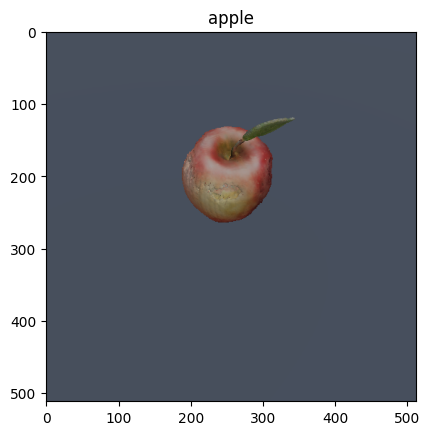

In [13]:
for path in model_paths:
    name = path.split('/')[-2]
    obj_cfgs, camera_cfgs = gen.model_configs(1, [name])
    obj_cfgs[0]["scale"] = 1.5
    env = gen.get_env(obj_cfgs, camera_cfgs)
    gen.initialize_positions(1, obj_cfgs)
    gen.brightness = 30


    # timestep can be increased to check for actual height and prevent
    # objects from exploding out of the ground because of the physics engine
    for i in range(1):
        env.obj.set_pose(Pose([0, 0, 0.25], env.obj.get_pose().q))
        obs, _, _, _, _ = env.step(env.action_space.sample())
        # clear_output(wait=True)
        plt.imshow(gen.get_image(obs, "none"))
        plt.title(name)
        plt.show()

    break